# Cascading Food Risks

## Imports

In [1]:
import pandas as pd
from src import trade_graph

%matplotlib inline

# Generate / load input data

In [2]:
trade_data = pd.read_csv("https://raw.githubusercontent.com/zutn/Trade-Reduction/master/trade_by_country_2017.csv", sep=";")

In [3]:
print(len(trade_data))

36771


In [4]:
trade_data.sample(4)

Reporter Countries Partner Countries          Element     Y2017
10422              Egypt      Saudi Arabia  Export Quantity  387975.0
15450          Indonesia           Ukraine  Export Quantity  359827.0
3435               Benin             Italy  Export Quantity     148.0
12262             Gambia          Malaysia  Import Quantity   37354.0

In [5]:
trade_data.columns = ['reporter', 'partner', 'element', 'value']
trade_data.sample(4)

reporter                   partner          element    value
11331       Fiji               New Zealand  Export Quantity   4429.0
1357   Australia                  Ethiopia  Export Quantity     10.0
15356  Indonesia  Northern Mariana Islands  Export Quantity    117.0
14768    Iceland  United States of America  Import Quantity  11582.0

In [6]:
poverty_data = pd.read_csv("../data/poverty_data.csv")
poverty_data.population_poverty = poverty_data.population_poverty.apply(lambda p: int(p.replace(',', '')))

In [7]:
poverty_data.sample(5)

country  percent_poverty  population  population_poverty
37    Sudan             13.6    41801533             5685008
71    Chile              0.7    18729160              131104
17     Chad             30.8    15477751             4767147
95  Uruguay              0.1     3449299                3449
26    Haiti             20.3    11123176             2258005

In [8]:
locust_data = pd.read_csv("../data/locust_data.csv")

In [9]:
locust_data.sample(5)

country locust_risk covid_locust_risk
23  United Arab Emirates         Low               NaN
9               Djibouti         Low               NaN
16          Saudi Arabia      Medium               NaN
25              Pakistan        High              High
21               Bahrain         Low               NaN

# Create scenario plots

Now we'll generate trade graphs for different lists of countries who cut off exports, highlighting resulting deficits using a chloropleth map

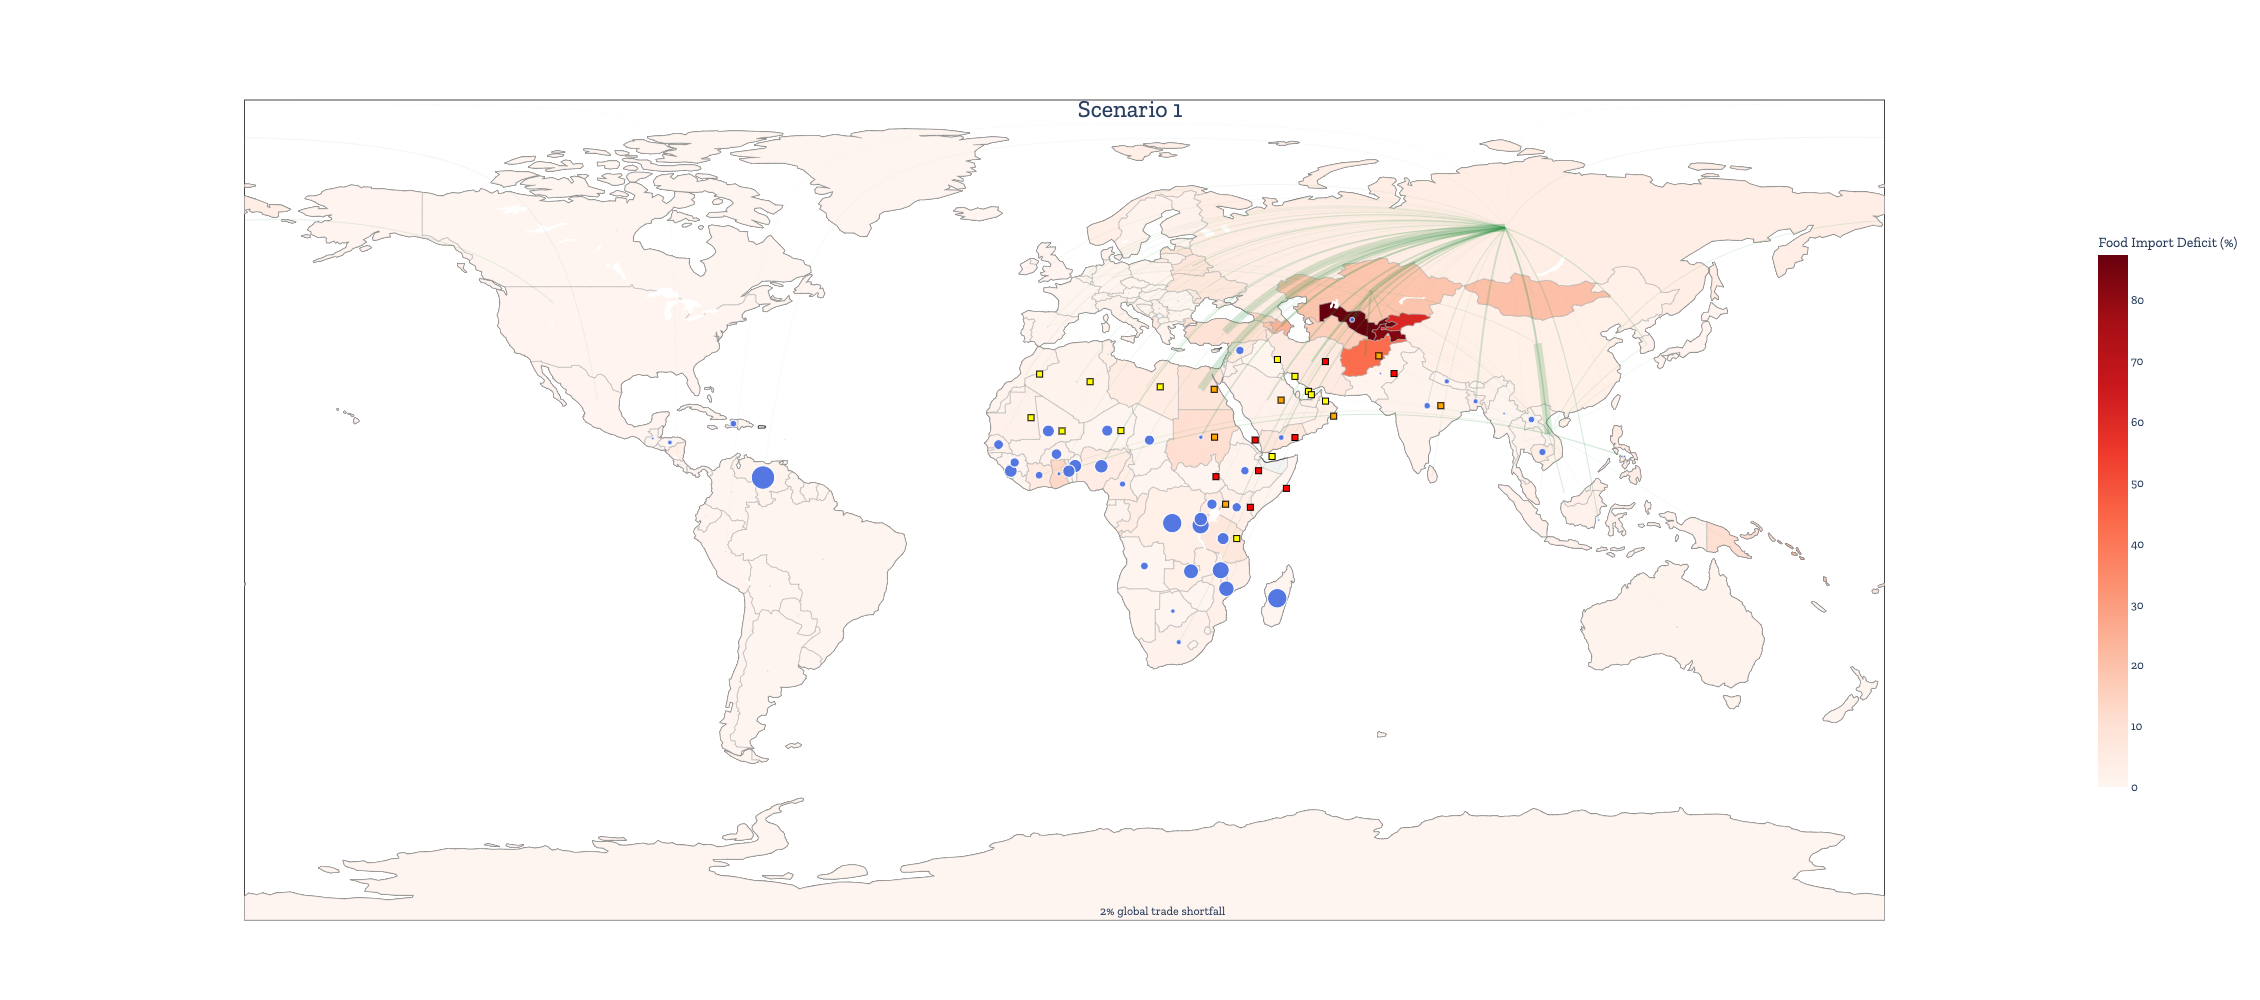

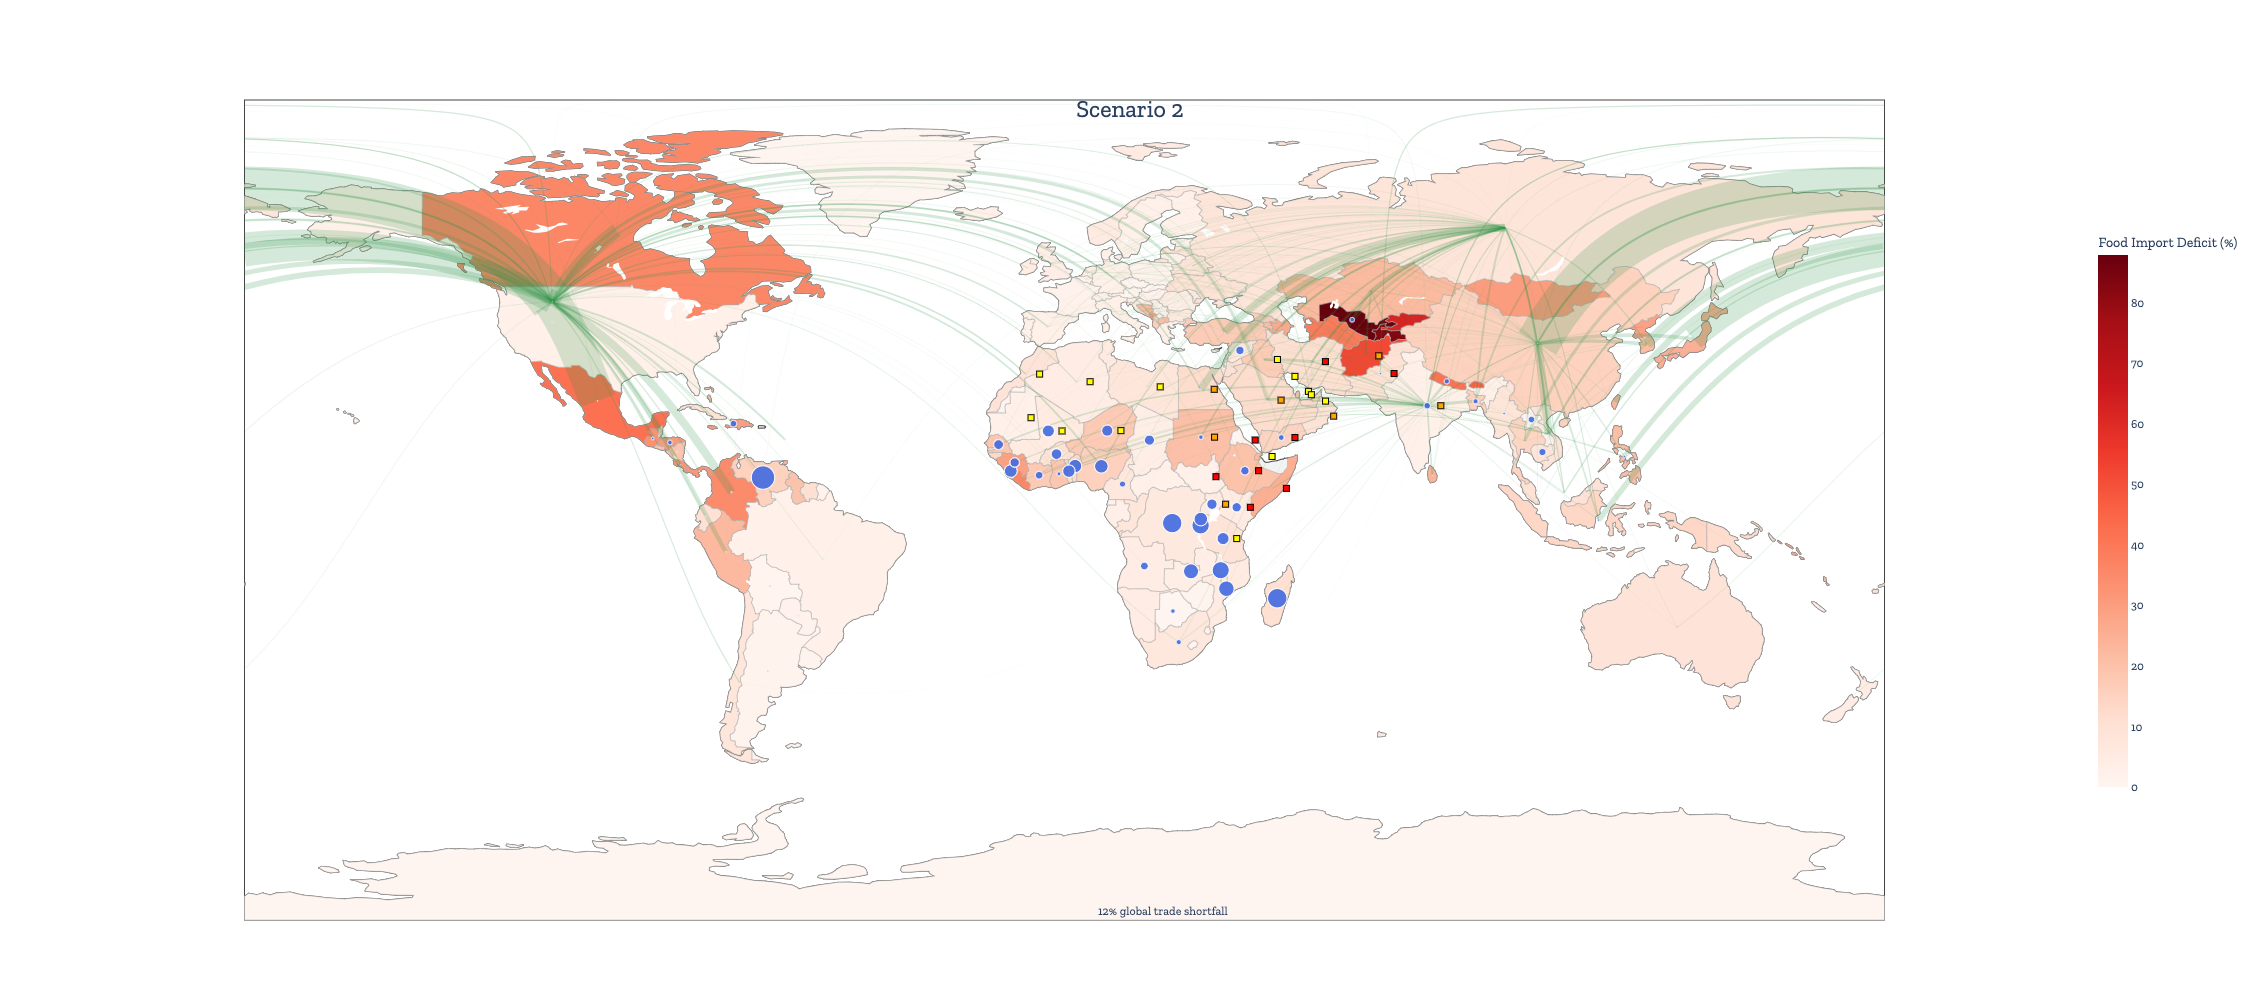

In [10]:
tg = trade_graph.TradeGraph(trade_data, locust_data, poverty_data) 
tg.plot_export_restriction_scenario({"Russian Federation": 0.7, "Kazakhstan":0, "Viet Nam":0.5}, title='Scenario 1', show_poverty=True, show_locusts=True)
tg.plot_export_restriction_scenario({"Russian Federation": 0.7, "Kazakhstan":0, "China, mainland":0.7, "United States of America": 0.5, "Iran (Islamic Republic of)": 0.5, "Serbia":0.5, "Viet Nam":0.5, "India":0.5}, title='Scenario 2', show_poverty=True, show_locusts=True)